# Curvas de Calibração Fuzzy para Previsão da Concentração de Soluções

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Tratamento de dados

In [2]:
df = pd.read_csv("CoCl2_Glauber_Yasmin.txt", sep = ";", skiprows = 20)

df = df[:63]
concentracao_CoCl2 = [0, 2, 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
concentracao_final = concentracao_CoCl2[1:]

concentracao = []
for x in concentracao_CoCl2:
        concentracao.append(x)
        concentracao.append(x)
        concentracao.append(x)

df["Concentração"] = concentracao
df = df.rename(columns={'A492': 'Absorbância'})
df

,Well,Name,Absorbância,Concentração
0,A1,Sample 1.1,0.029,0.0
1,A2,Sample 1.2,0.031,0.0
2,A3,Sample 1.3,0.028,0.0
3,A4,Sample 1.4,2.866,2.0
4,A5,Sample 1.5,2.850,2.0
...,...,...,...,...
58,E11,Sample 1.59,0.322,0.2
59,E12,Sample 1.60,0.330,0.2
60,F1,Sample 1.61,0.205,0.1
61,F2,Sample 1.62,0.194,0.1


In [3]:
from lei_de_lambert_fuzzy import trata_dados, trata_dados_fuzzy

absorb = df["Absorbância"]

absorb_final, desv_final = trata_dados(absorb)
absorb_fuzzy = trata_dados_fuzzy(absorb)

In [4]:
# Índices de treino
i_data = set(range(3, 8)) | set(range(9, 14)) | set(range(15, 20))

# Todos os índices
i_total = set(range(20))

# Índices de teste = complementares
i_prev = i_total - i_data

xr_data = np.array([concentracao_final[i] for i in i_data])
xr_prev = np.array([concentracao_final[i] for i in i_prev])
yr_data = np.array([absorb_final[i] for i in i_data])
yr_err = np.array([desv_final[i] for i in i_data])

yr_prev = np.array([absorb_final[i] for i in i_prev])
yr_err_prev = np.array([desv_final[i] for i in i_prev])

xf_data = np.array([concentracao_final[i] for i in i_data]).reshape(-1, 1)
xf_prev = np.array([concentracao_final[i] for i in i_prev]).reshape(-1, 1)
yf_data = np.array([absorb_fuzzy[i] for i in i_data])
yf_prev = np.array([absorb_fuzzy[i] for i in i_prev])

title = "Concentração por Absorbância fuzzy (CoCl2)"

### Ajuste e previsão clássicos

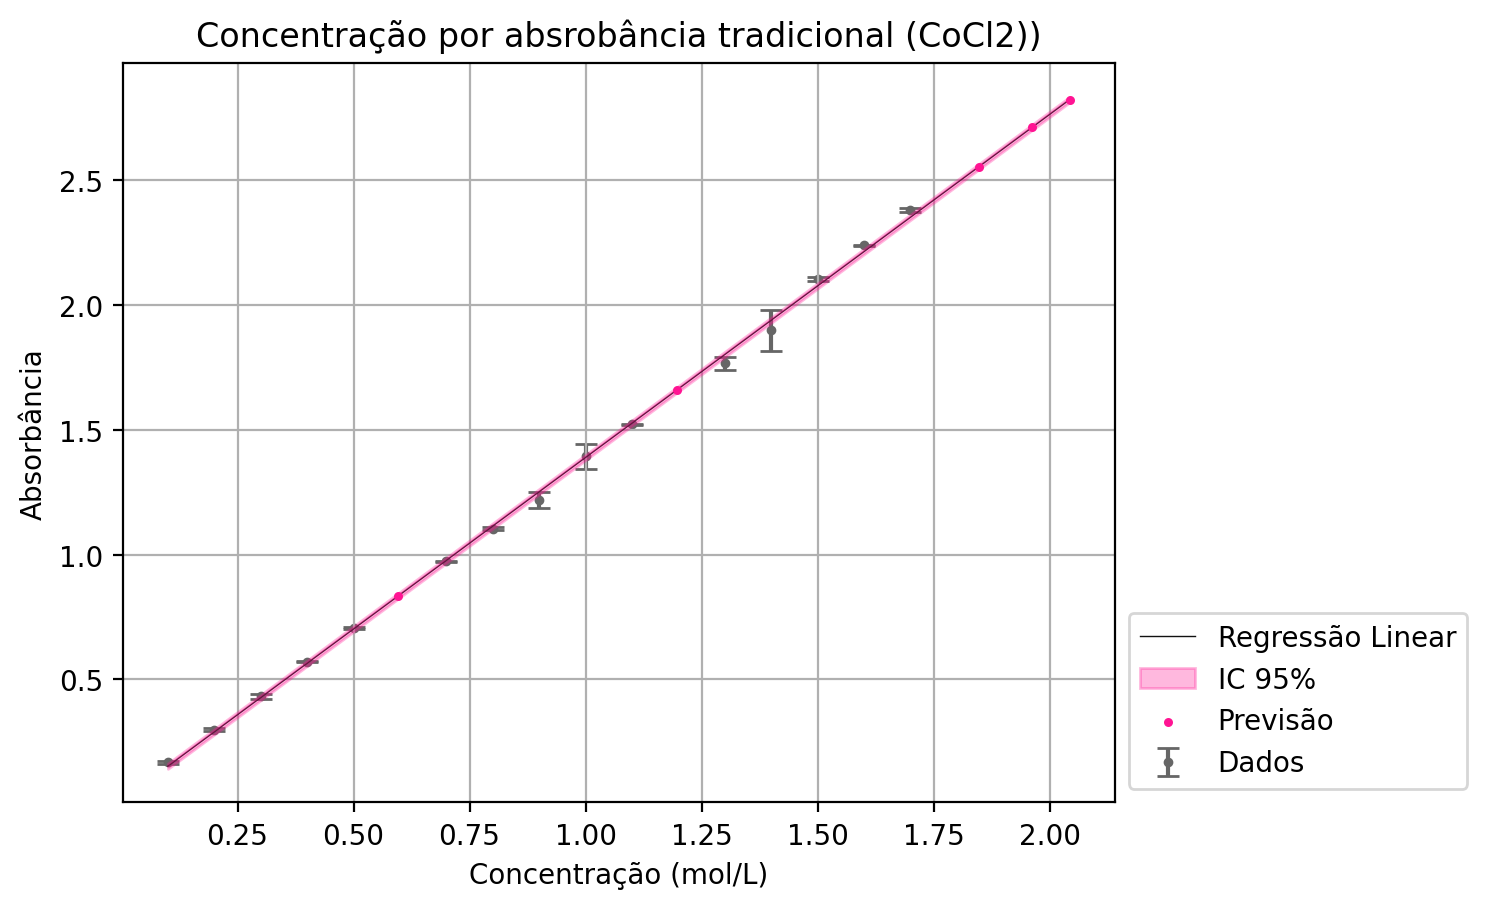

[0.015200854700854432, 1.3748632478632477]
[2.043208648568001, 1.9622308978670766, 1.8470679290558818, 1.1973063366053505, 0.595064621811649]


In [5]:
from lei_de_lambert_fuzzy import lei_lambert

coefs, conc_prev = lei_lambert(xr_data, yr_data, yr_err, abs_prev = yr_prev)
print(coefs)
print(conc_prev)

### Ajuste e previsão Fuzzy

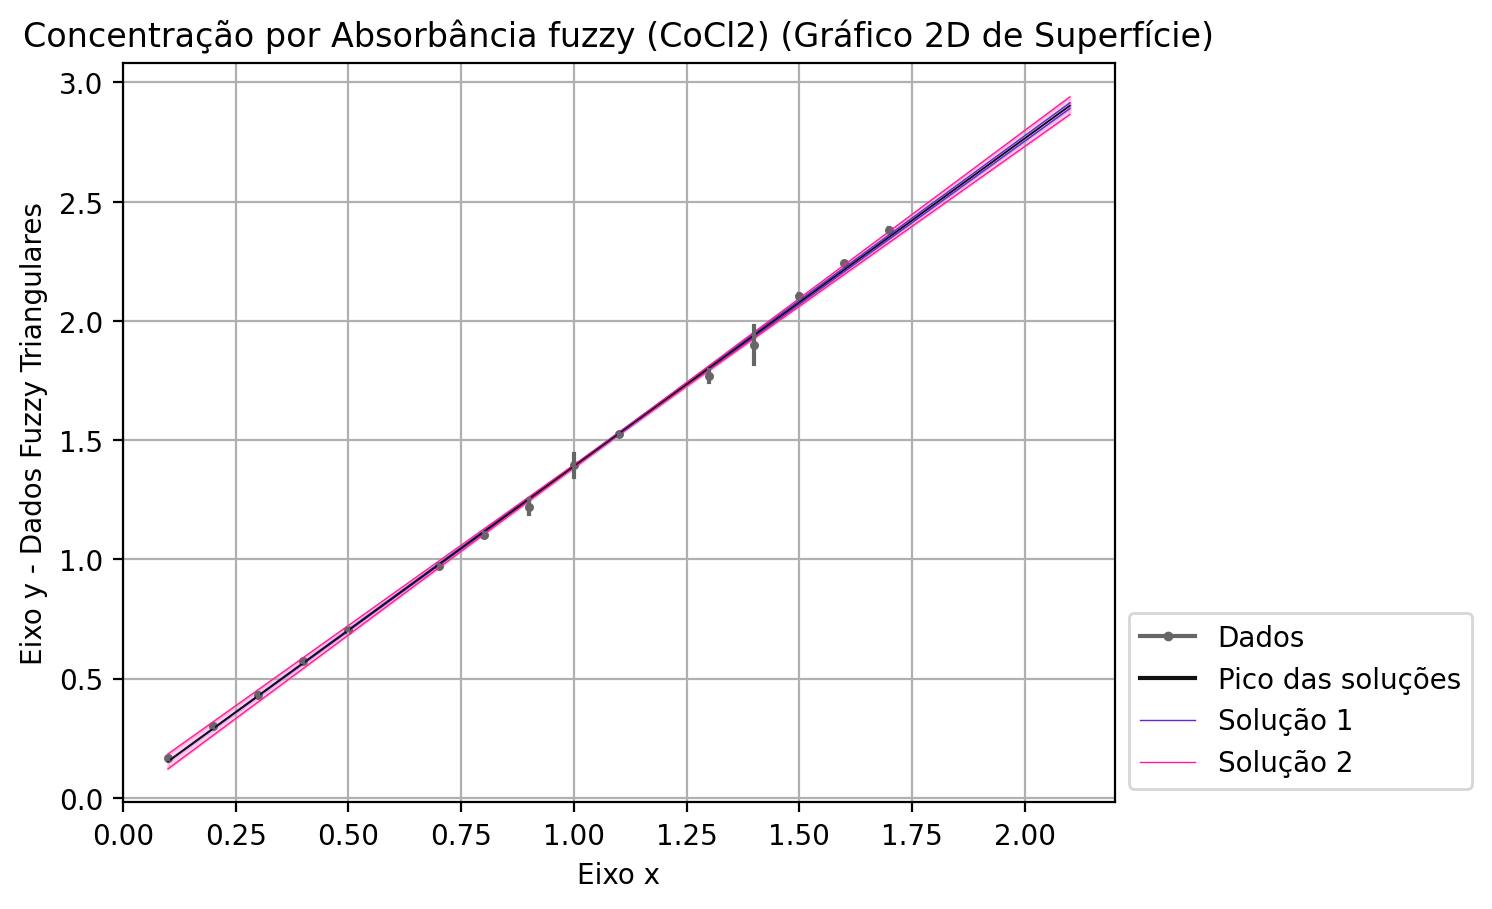

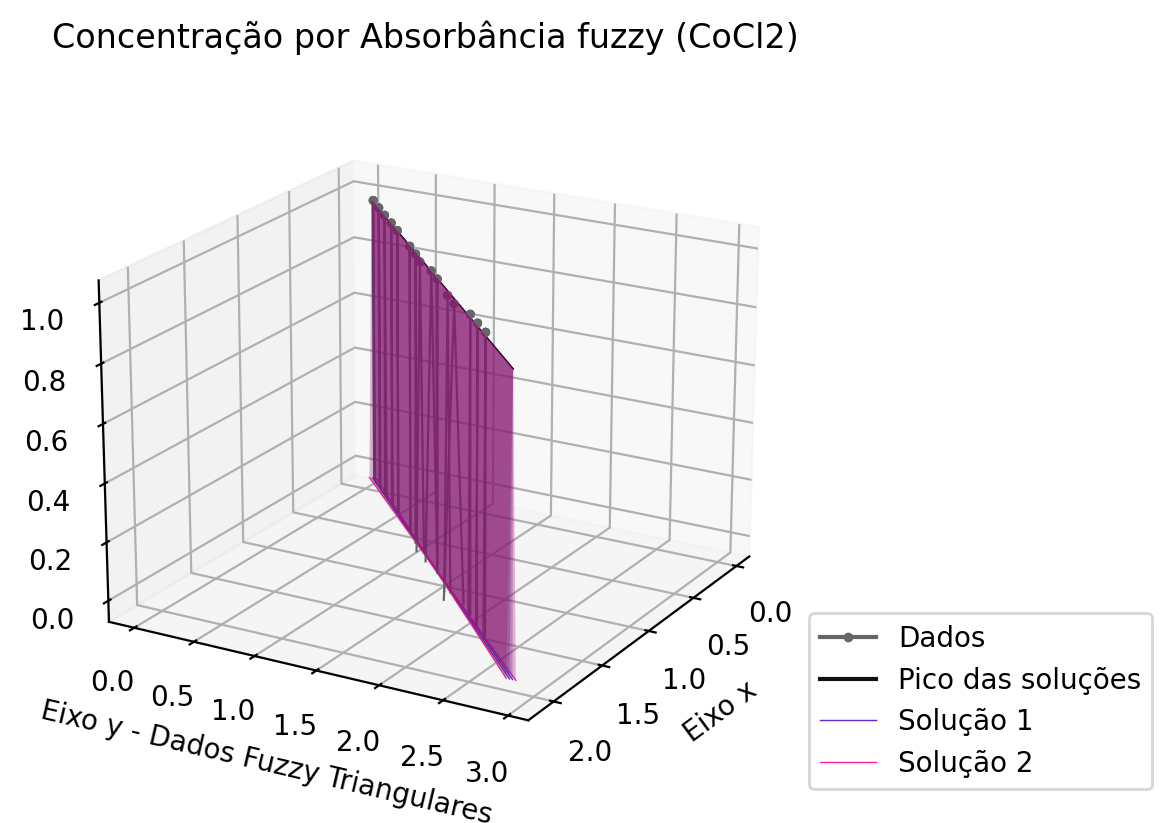

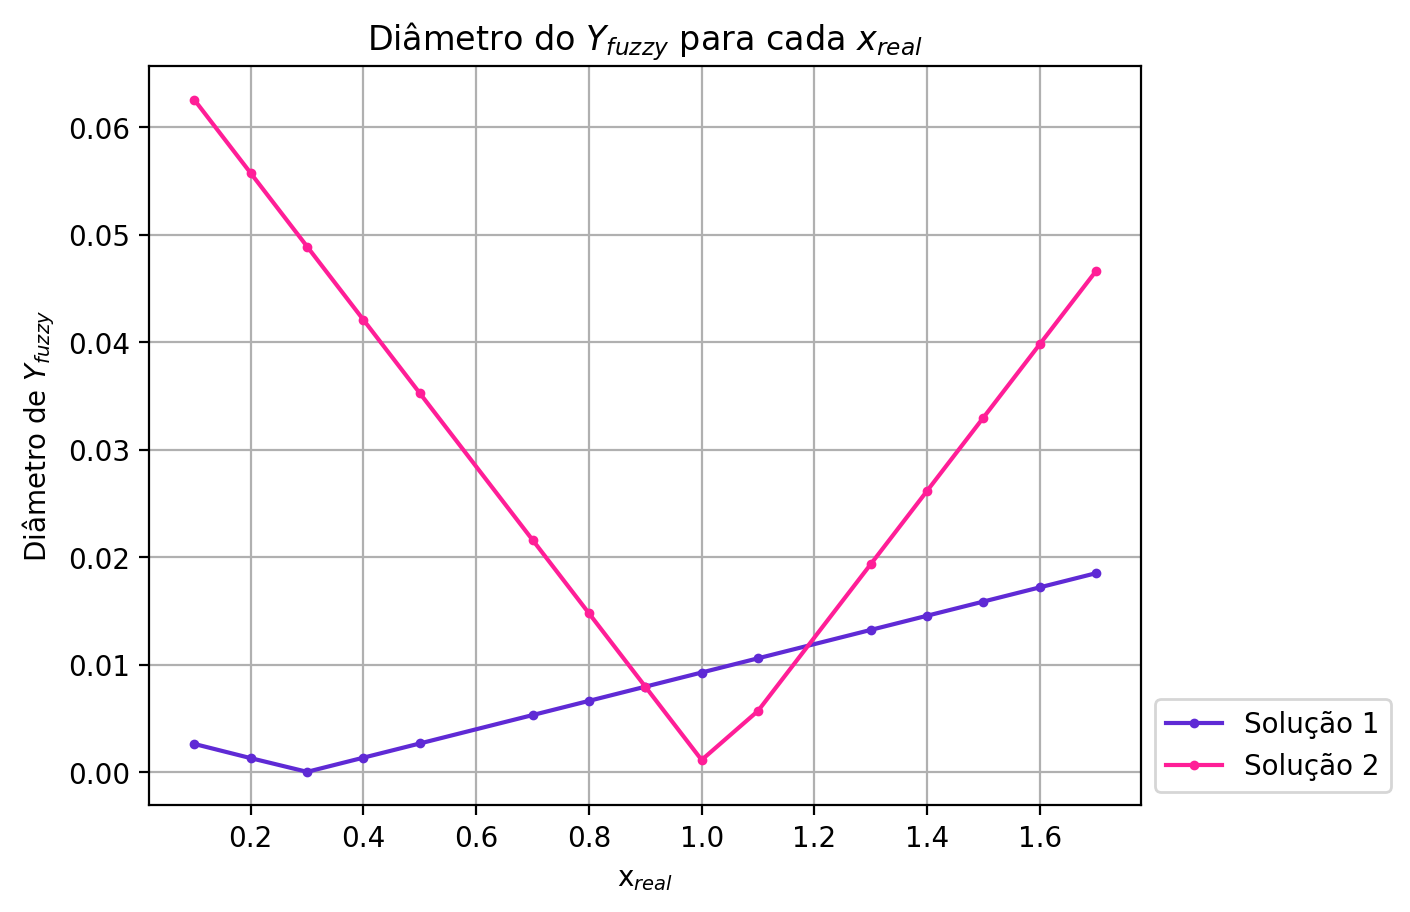

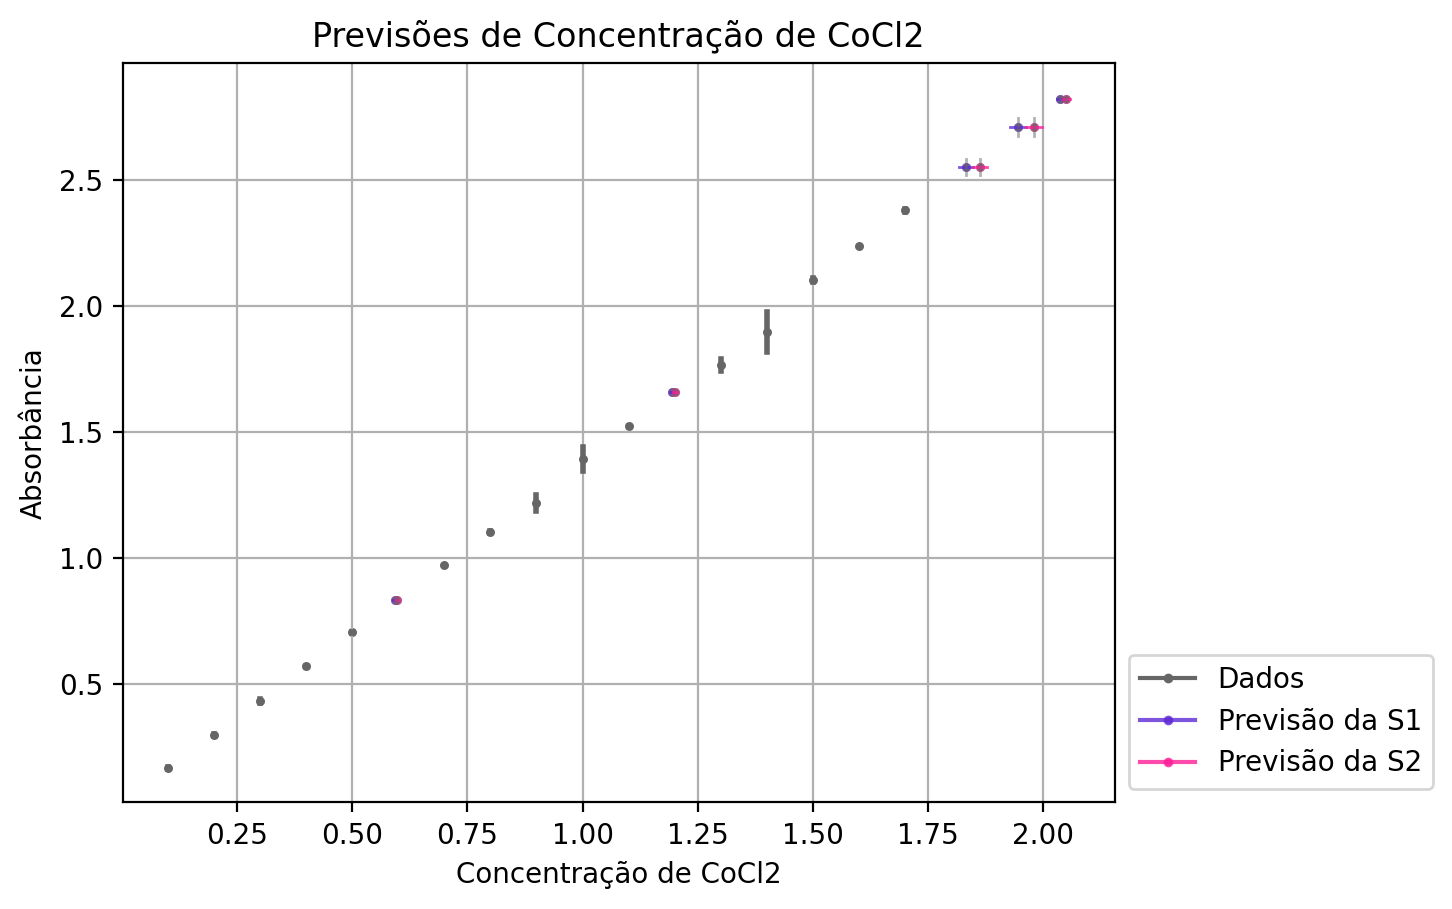

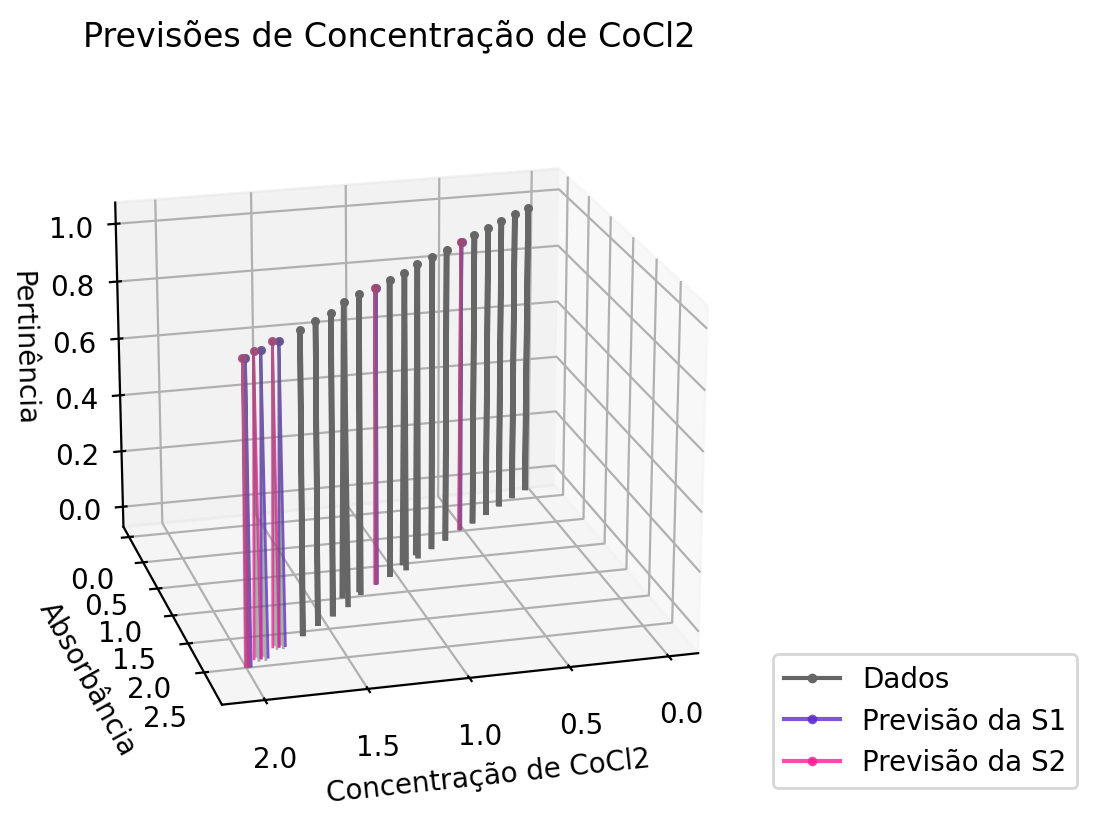

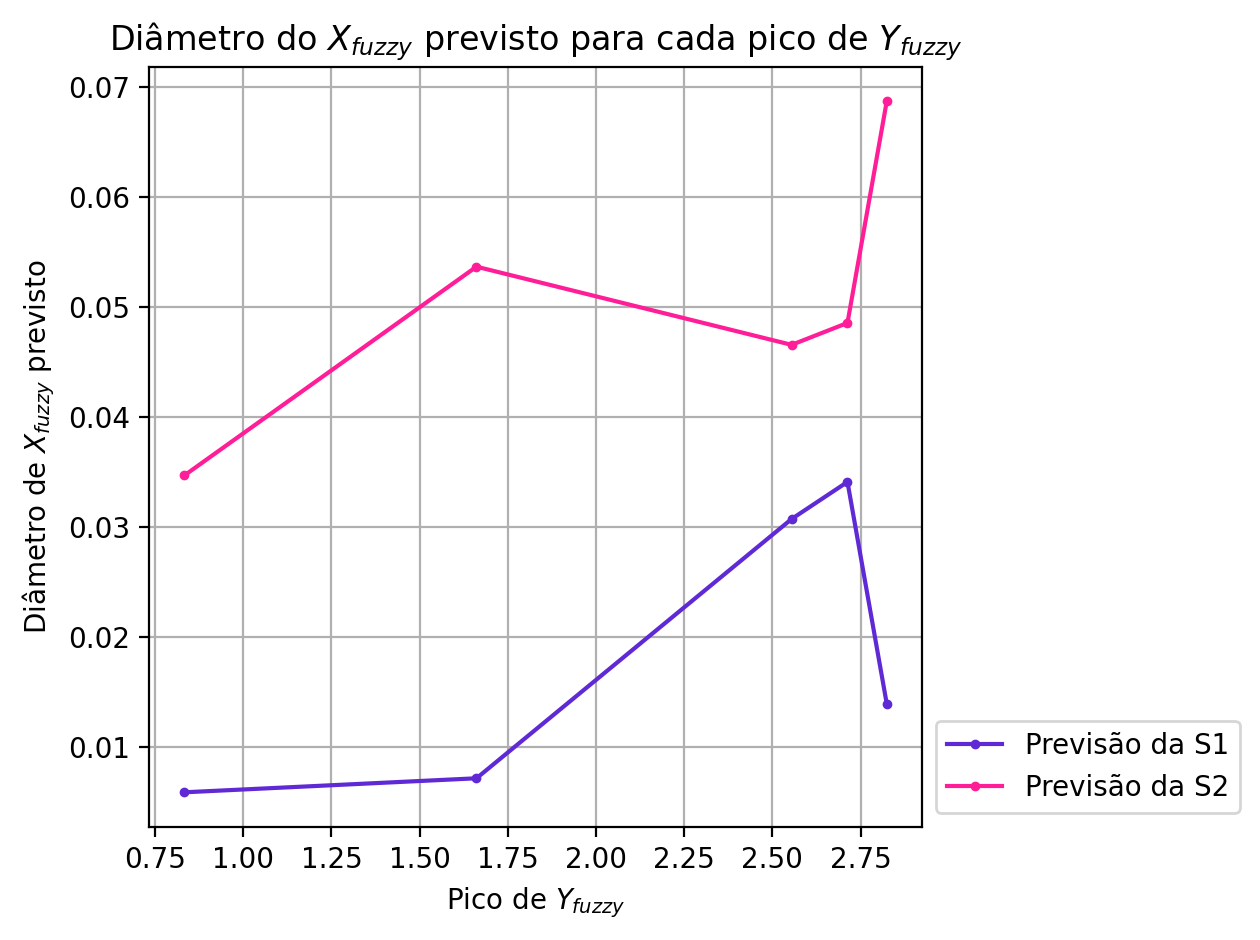

In [6]:
from lei_de_lambert_fuzzy import lei_lambert_fuzzy

sol, xp = lei_lambert_fuzzy(xf_data, yf_data, y_prev = yf_prev, titulo_grafico = title, xlabel = "Concentração de CoCl2", ylabel = "Absorbância")

## Resultados obtidos

In [7]:
from lei_de_lambert_fuzzy import representacao_triangular

xpt1 = [representacao_triangular(x) for x in xp[0]]
xpt2 = [representacao_triangular(x) for x in xp[1]]

In [8]:
print("------- REGRESSÃO LINEAR -------")

print(" ")

print(f"Ajuste de curva real:")
print(coefs)

print(" ")

print(f"Ajuste de curva fuzzy:")
print(sol)

print(" ")

print("--- PREVISÃO DE CONCENTRAÇÃO ---")

print(" ")

print(f"Concentrações reais para previsão:")
print(xr_prev)

print(" ")

print(f"Previsão de concentração real:")
print(conc_prev)

print(f"Previsão de concentração fuzzy pela solução 1:")
print(xpt1)

print(f"Previsão de concentração fuzzy pela solução 2:")
print(xpt2)

------- REGRESSÃO LINEAR -------
 
Ajuste de curva real:
[0.015200854700854432, 1.3748632478632477]
 
Ajuste de curva fuzzy:
[[[ 1.36826  1.37486  1.38147]
  [ 0.01323  0.0152   0.01717]]

 [[ 1.34073  1.37486  1.409  ]
  [-0.0195   0.0152   0.0499 ]]]
 
--- PREVISÃO DE CONCENTRAÇÃO ---
 
Concentrações reais para previsão:
[2.  1.9 1.8 1.2 0.6]
Previsão de concentração real:
[2.043208648568001, 1.9622308978670766, 1.8470679290558818, 1.1973063366053505, 0.595064621811649]
Previsão de concentração fuzzy pela solução 1:
[(2.029283203086009, 2.0432140969504777, 2.0572645550549153), (1.928153967950594, 1.9622361549539589, 1.9966330506594456), (1.8163603833604713, 1.847072914090647, 1.8780684625234554), (1.1901549315825415, 1.197309786693433, 1.204524968451415), (0.5891853235118826, 0.5950666492103439, 0.6010004076671878)]
Previsão de concentração fuzzy pela solução 2:
[(1.9745513130585086, 2.0432140969504777, 2.1153579516884298), (1.913709625340459, 1.9622361549539589, 2.0132190209030103),